# Moving Average Model

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('rhine-river-near-basle-switzerla.csv')

In [3]:
data.head()

,Year,"Rhine River near basle, Switzerland, 1807 - 1957"
0,1807,864.884
1,1808,1033.141
2,1809,826.923
3,1810,1018.777
4,1811,1118.296


In [4]:
test_size = 20

In [5]:
y = data['Rhine River near basle, Switzerland, 1807 - 1957'][:-test_size]
y_orig = data['Rhine River near basle, Switzerland, 1807 - 1957']

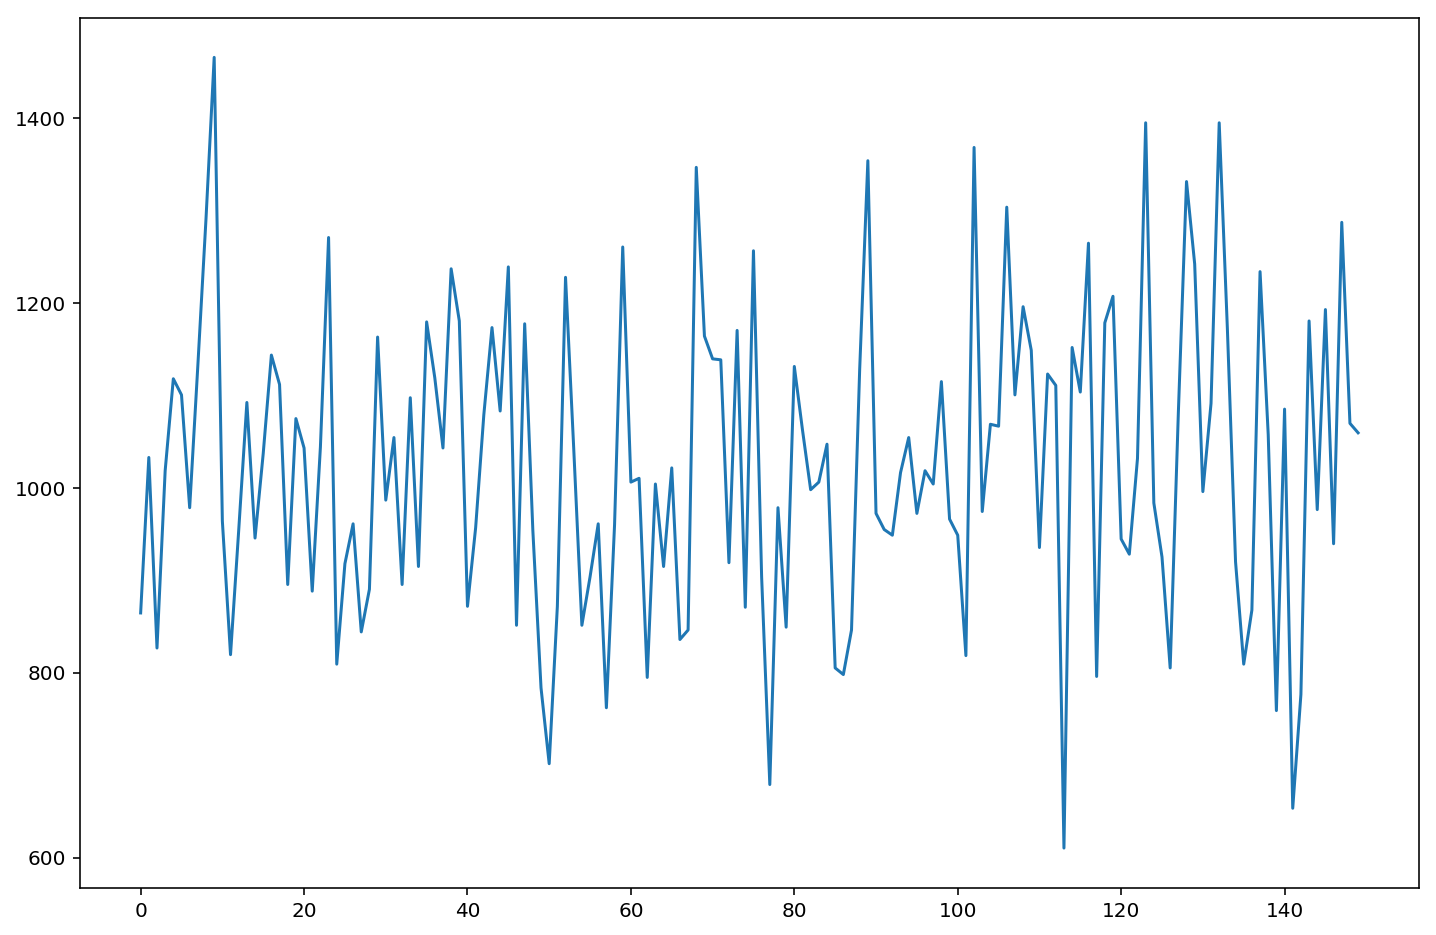

In [6]:
fig = plt.figure(figsize=(12,8))
plt.plot(y_orig)
plt.show()

In [7]:
#difference the time series to remove trends
ydiff = np.empty(data.shape[0]-test_size-1)
for i in range(data.shape[0]-test_size-1):
    ydiff[i] = y[i+1] - y[i]

In [8]:
#remove the base by subtracting mean
y_base = np.mean(ydiff)
y_delev = ydiff - y_base

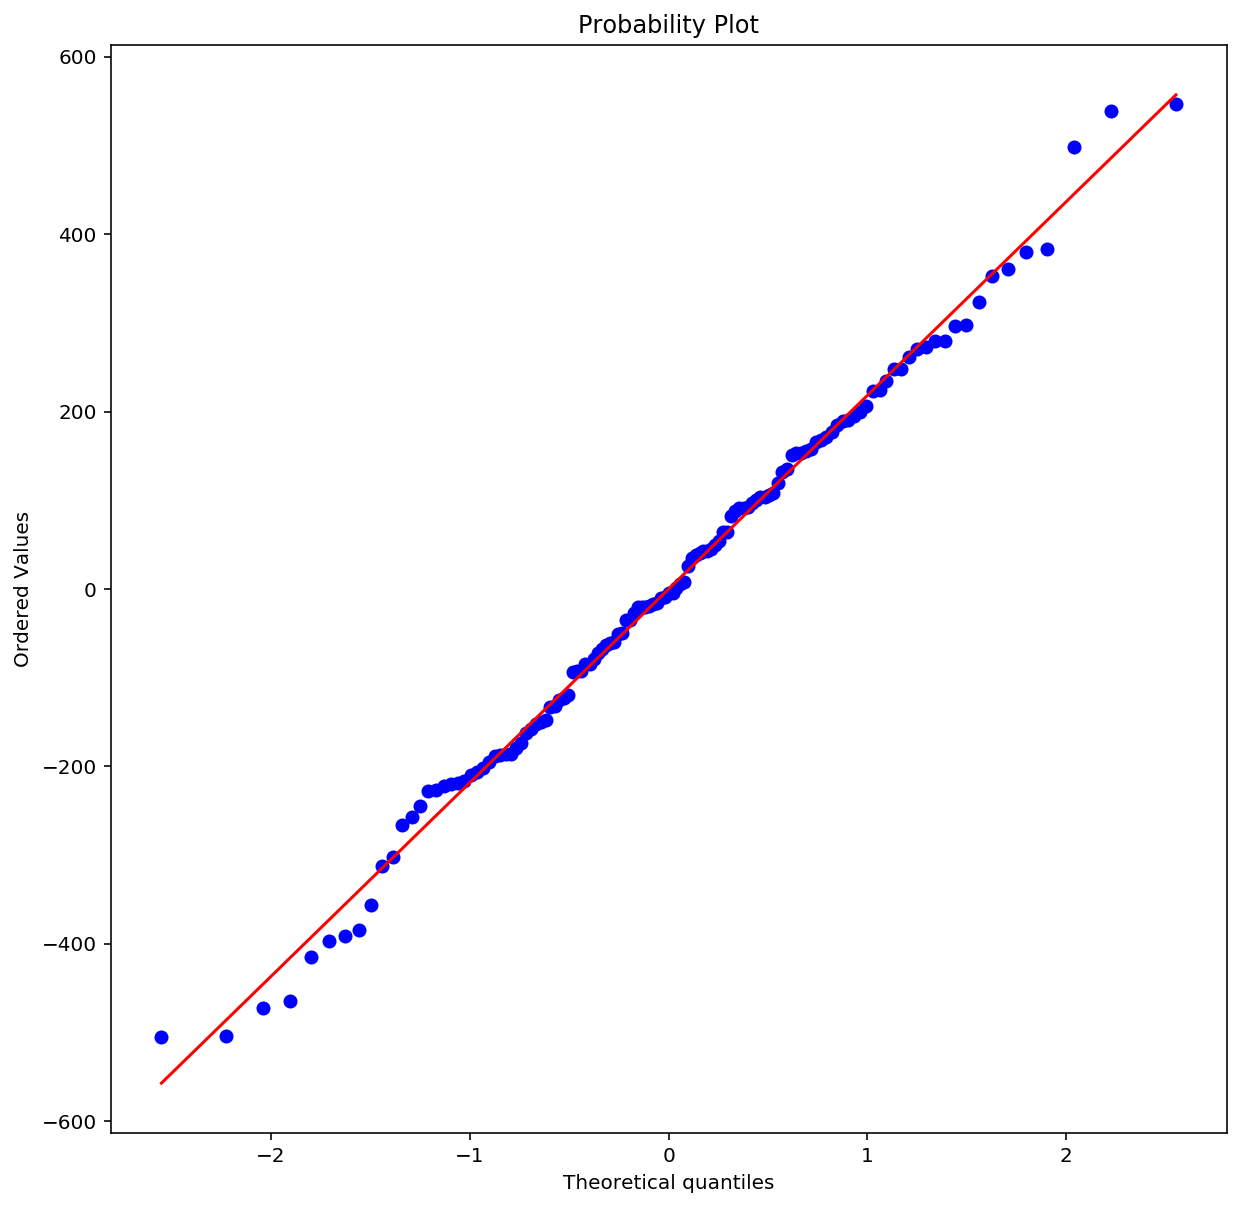

In [10]:
#make QQ-plot to check for stationary data visually
import pylab
import scipy.stats as stats
fig = plt.figure(figsize=(10,10))
stats.probplot(y_delev, dist="norm", plot=pylab)
pylab.show();

In [13]:
#make auto-correlation function

def auto_correlation(t,max_lag = 20):
    acf_score = []
    for lag in range(max_lag):
        t1 = t[lag+1:]
        t2 = t[:-lag-1]
        score = np.corrcoef(t1,t2)[0,1]
        acf_score.append(score)
        
    return acf_score

In [17]:
acf_score = auto_correlation(y_delev)
x_axis = np.arange(len(acf_score))+1

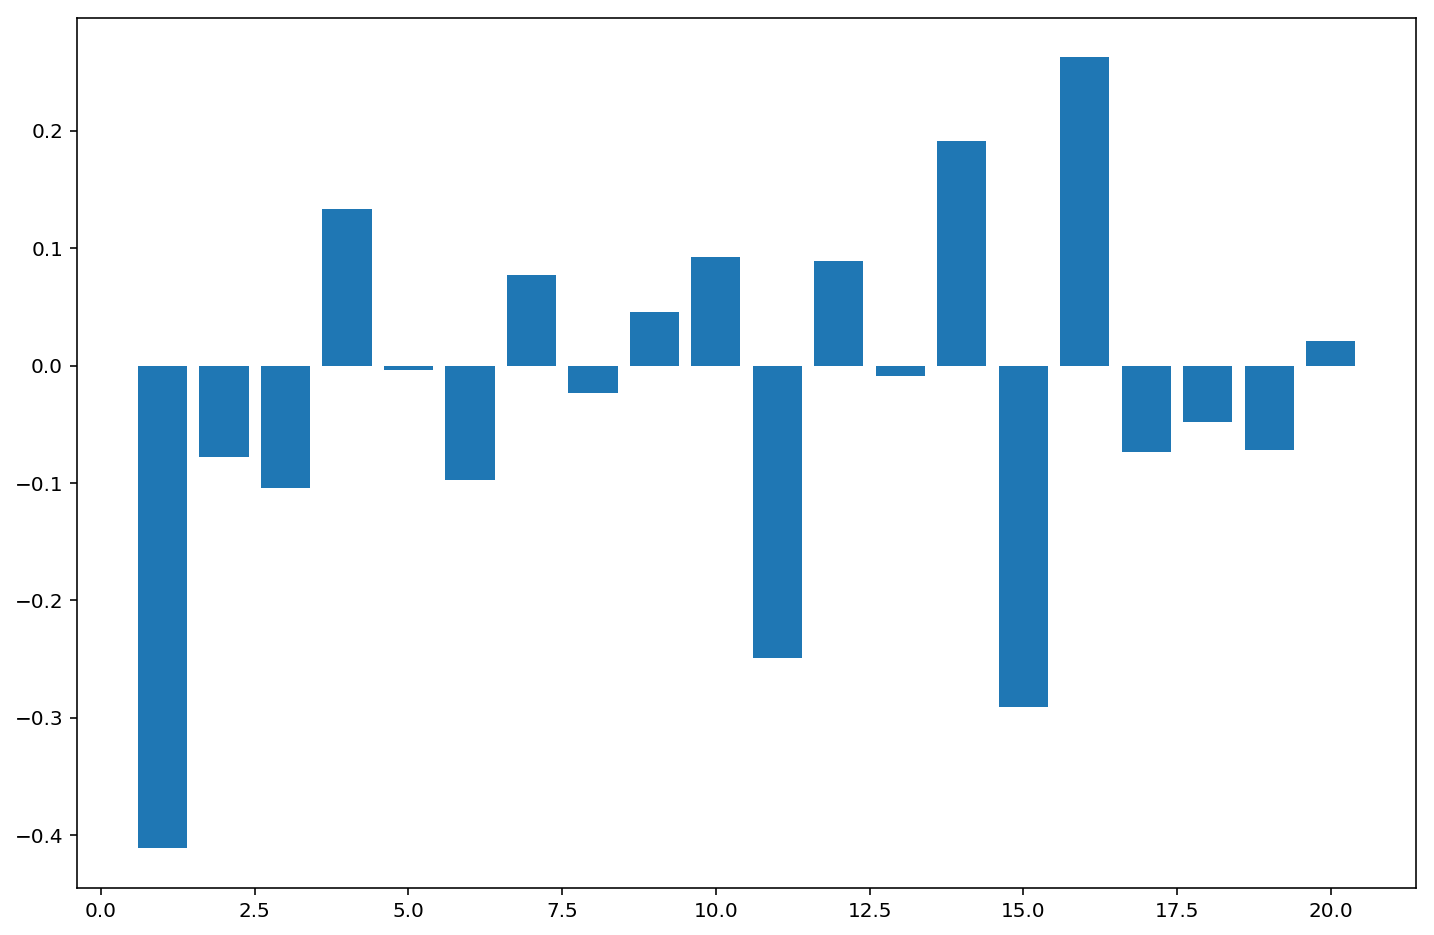

In [18]:
fig = plt.figure(figsize=(12,8))
plt.bar(x_axis,acf_score)
plt.show();

In [40]:
#Build a MA model
lag = 9
n = y_delev.shape[0] - lag

In [41]:
X = np.empty((n,lag+1))

In [42]:
X[:,0] = 1

In [43]:
for i in range(lag):
    X[:,i+1] = y_delev[lag-(i+1):-(i+1)]
    

In [44]:
Y = y_delev[lag:]

In [45]:
from sklearn.linear_model import LinearRegression

In [46]:
model1 = LinearRegression(fit_intercept=False)

In [47]:
model1.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=1, normalize=False)

In [48]:
coef = model1.coef_

In [49]:
#Make predictions
for i in range(test_size):
    etp1 = coef[0]
    for j in range(lag):
        etp1 = etp1 + coef[j+1]*y_delev[-j-1]
        
    y_delev = np.append(y_delev,etp1)

In [50]:
y_undelev = y_delev+y_base

In [51]:
y_hat = np.empty(data.shape[0])

In [52]:
#undo the differencing
y_hat[0] = y[0]
for i in range(data.shape[0]-1):
    y_hat[i+1] = y_undelev[i]+y_hat[i]

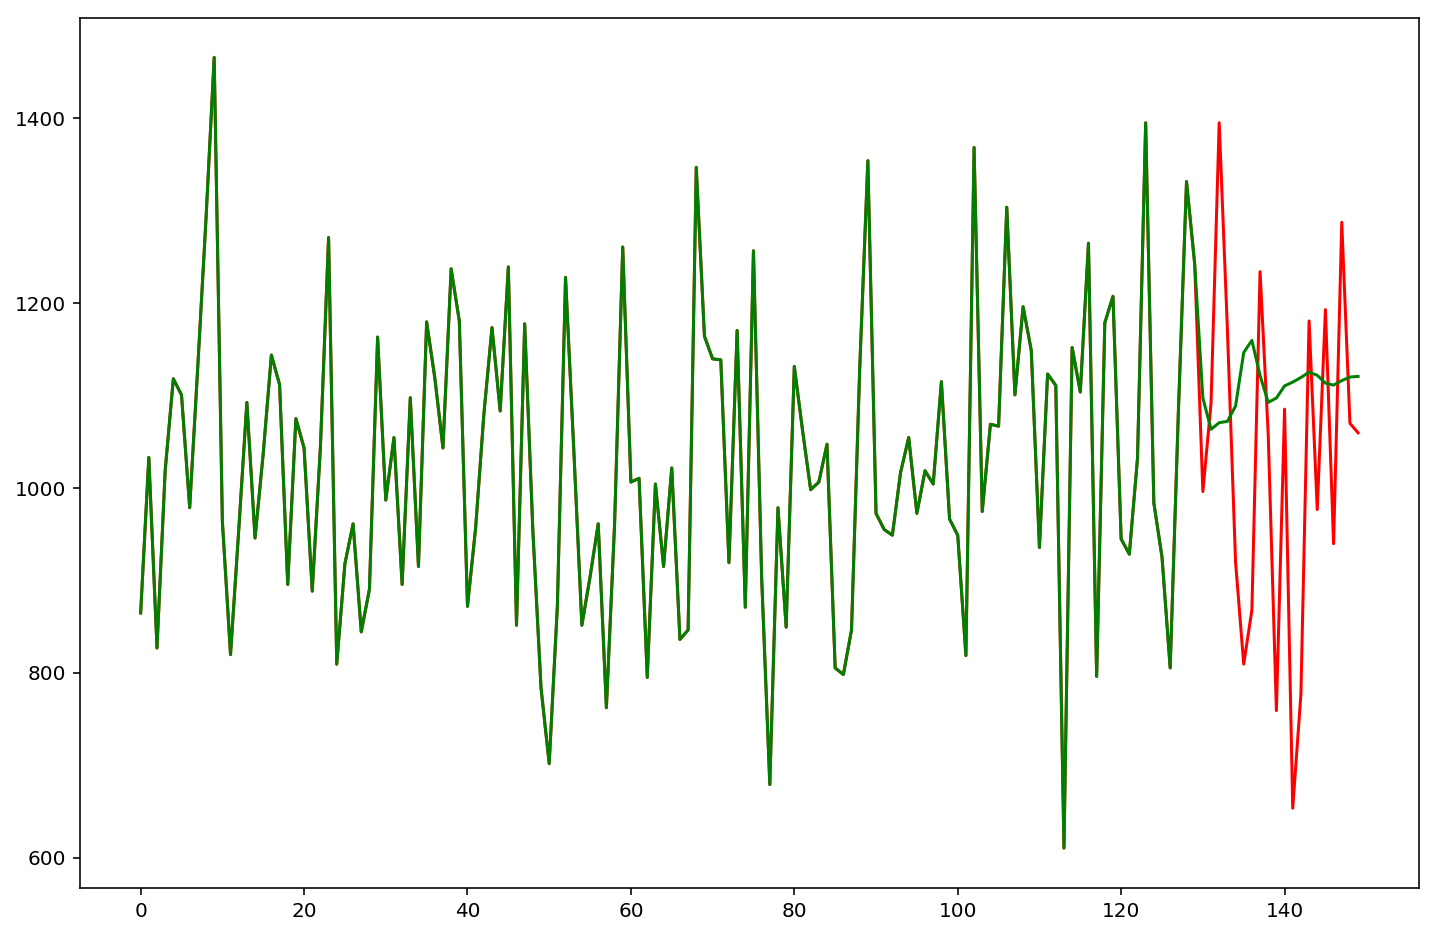

In [53]:
fig = plt.figure(figsize=(12,8))
plt.plot(y_orig, 'r')
plt.plot(y_hat, 'g')
plt.show()

In [54]:
def rmse_score(y1,y2):
    return np.sqrt(np.mean((y1-y2)**2))

In [55]:
rmse = rmse_score(y_orig[-test_size:], y_hat[-test_size:])
rmse

213.12891737985234